HOW TO READ ASTRONOMICAL (SDSS) SPECTRA FITS FILE ?


https//classic.sdss.org/dr6/algorithms/linestable.html

In [26]:
!matplotlib widget

Traceback (most recent call last):
  File "C:\Users\sumit\anaconda4\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
             ^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [8]:
file=fits.open('arp_spec.fits')
file.info()

Filename: arp_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3808R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [9]:
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4647737895.83 / 1st row Number of seconds since Nov 17 1858    
RA      =            169.25797 / 1st row RA of telescope boresight (deg)        
DEC     =            29.322839 / 1st row Dec of telescope boresight (degrees)   
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '06:00:43.28'        / 1st row TAI time HH:MM:SS.SS                   
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                53793 / MJD of observation                             
MJDLIST = '53793   '        

In [10]:
data=file[1].data
data

FITS_rec([( 20.860157, 3.5825, 0.08006831, 0, 0, 1.2106612 , 3.0118814,  16.539915),
          ( 21.054255, 3.5826, 0.07962513, 0, 0, 1.2104557 , 3.0584102,  15.278049),
          ( 20.759298, 3.5827, 0.08150818, 0, 0, 1.210248  , 3.1245375,  13.330789),
          ...,
          (119.58118 , 3.963 , 0.10038973, 0, 0, 0.73342866, 2.2503564, 124.16756 ),
          (113.437996, 3.9631, 0.10507996, 0, 0, 0.7334814 , 2.3265345, 123.52868 ),
          (114.139946, 3.9632, 0.10427404, 0, 0, 0.7335349 , 2.42949  , 124.37155 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Text(0, 0.5, 'Flux $ 10^(-17) erg/cm^2/s/$\\AA$')

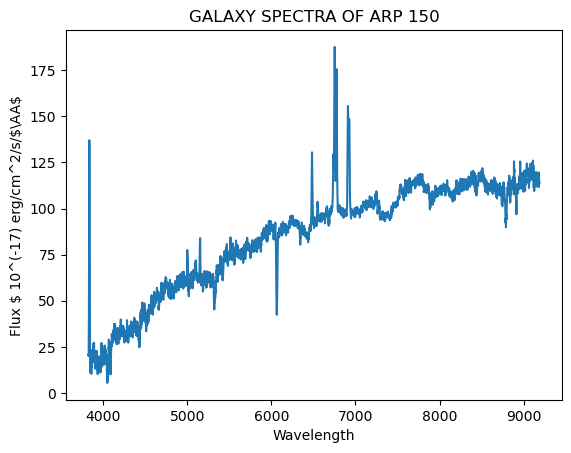

In [ ]:

flux=data['flux']
wav=10**data['loglam']
plt.plot(wav,flux)

#redshift
z=file[2].data['z']
z=z[0]
z

plt.title('GALAXY SPECTRA OF ARP 150 in moving frame')
plt.xlabel('Wavelength')
plt.ylabel(r'Flux $ 10^(-17) erg/cm^2/s/$\AA$')

## Spectra in rest frame for z=0.0288


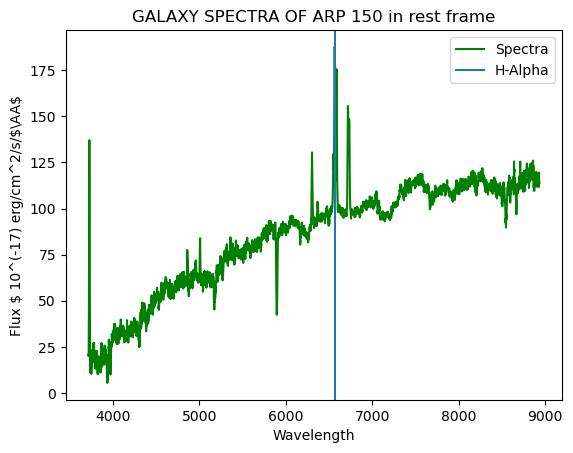

In [34]:
plt.figure()
plt.plot(wav/(1+z),flux,color='green',label='Spectra')
plt.title('GALAXY SPECTRA OF ARP 150 in rest frame')
plt.xlabel('Wavelength')
plt.ylabel(r'Flux $ 10^(-17) erg/cm^2/s/$\AA$')
plt.axvline(x=6564.61,label='H-Alpha')
plt.legend()